In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
data=pd.read_csv("kidney_disease.csv")
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [4]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [5]:
len(list(data.columns))

25

In [6]:
data.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [9]:
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [11]:
data['class']=data['class'].replace("ckd\t","ckd")

In [12]:
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [14]:
#data=data.drop("id",axis=1)

In [15]:
data.shape

(400, 25)

In [16]:
data['class']=data['class'].replace(['ckd',"notckd"],[1,0]) # dummification

<ipython-input-16-4eaf10c71e5c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class']=data['class'].replace(['ckd',"notckd"],[1,0]) # dummification


In [17]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [18]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [19]:
data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [20]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [22]:
data['packed_cell_volume']

,packed_cell_volume
0,44.0
1,38.0
2,31.0
3,32.0
4,35.0
...,...
395,47.0
396,54.0
397,49.0
398,51.0


In [23]:
# converting necessary columns to numerical type

data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

In [24]:
data.isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
blood_glucose_random,44


In [25]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]
num_col=[col for col in data.columns if data[col].dtype!="object"]

In [26]:
for col in cat_col:
    print(f"{col} has {data[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [27]:
data.diabetes_mellitus=data["diabetes_mellitus"]. replace( ["\tno",'\tyes'],["no","yes"])


data.coronary_artery_disease= data['coronary_artery_disease'].replace('\tno','no')

In [28]:
cols = ['diabetes_mellitus', 'coronary_artery_disease']
for col in cols:
    print(f"{col} has {data[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values



<ipython-input-29-3c2c9691ec31>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-29-3c2c9691ec31>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-29-3c2c9691ec31>:8: UserWarning: 

`distplot` is a deprecated function and will be removed 

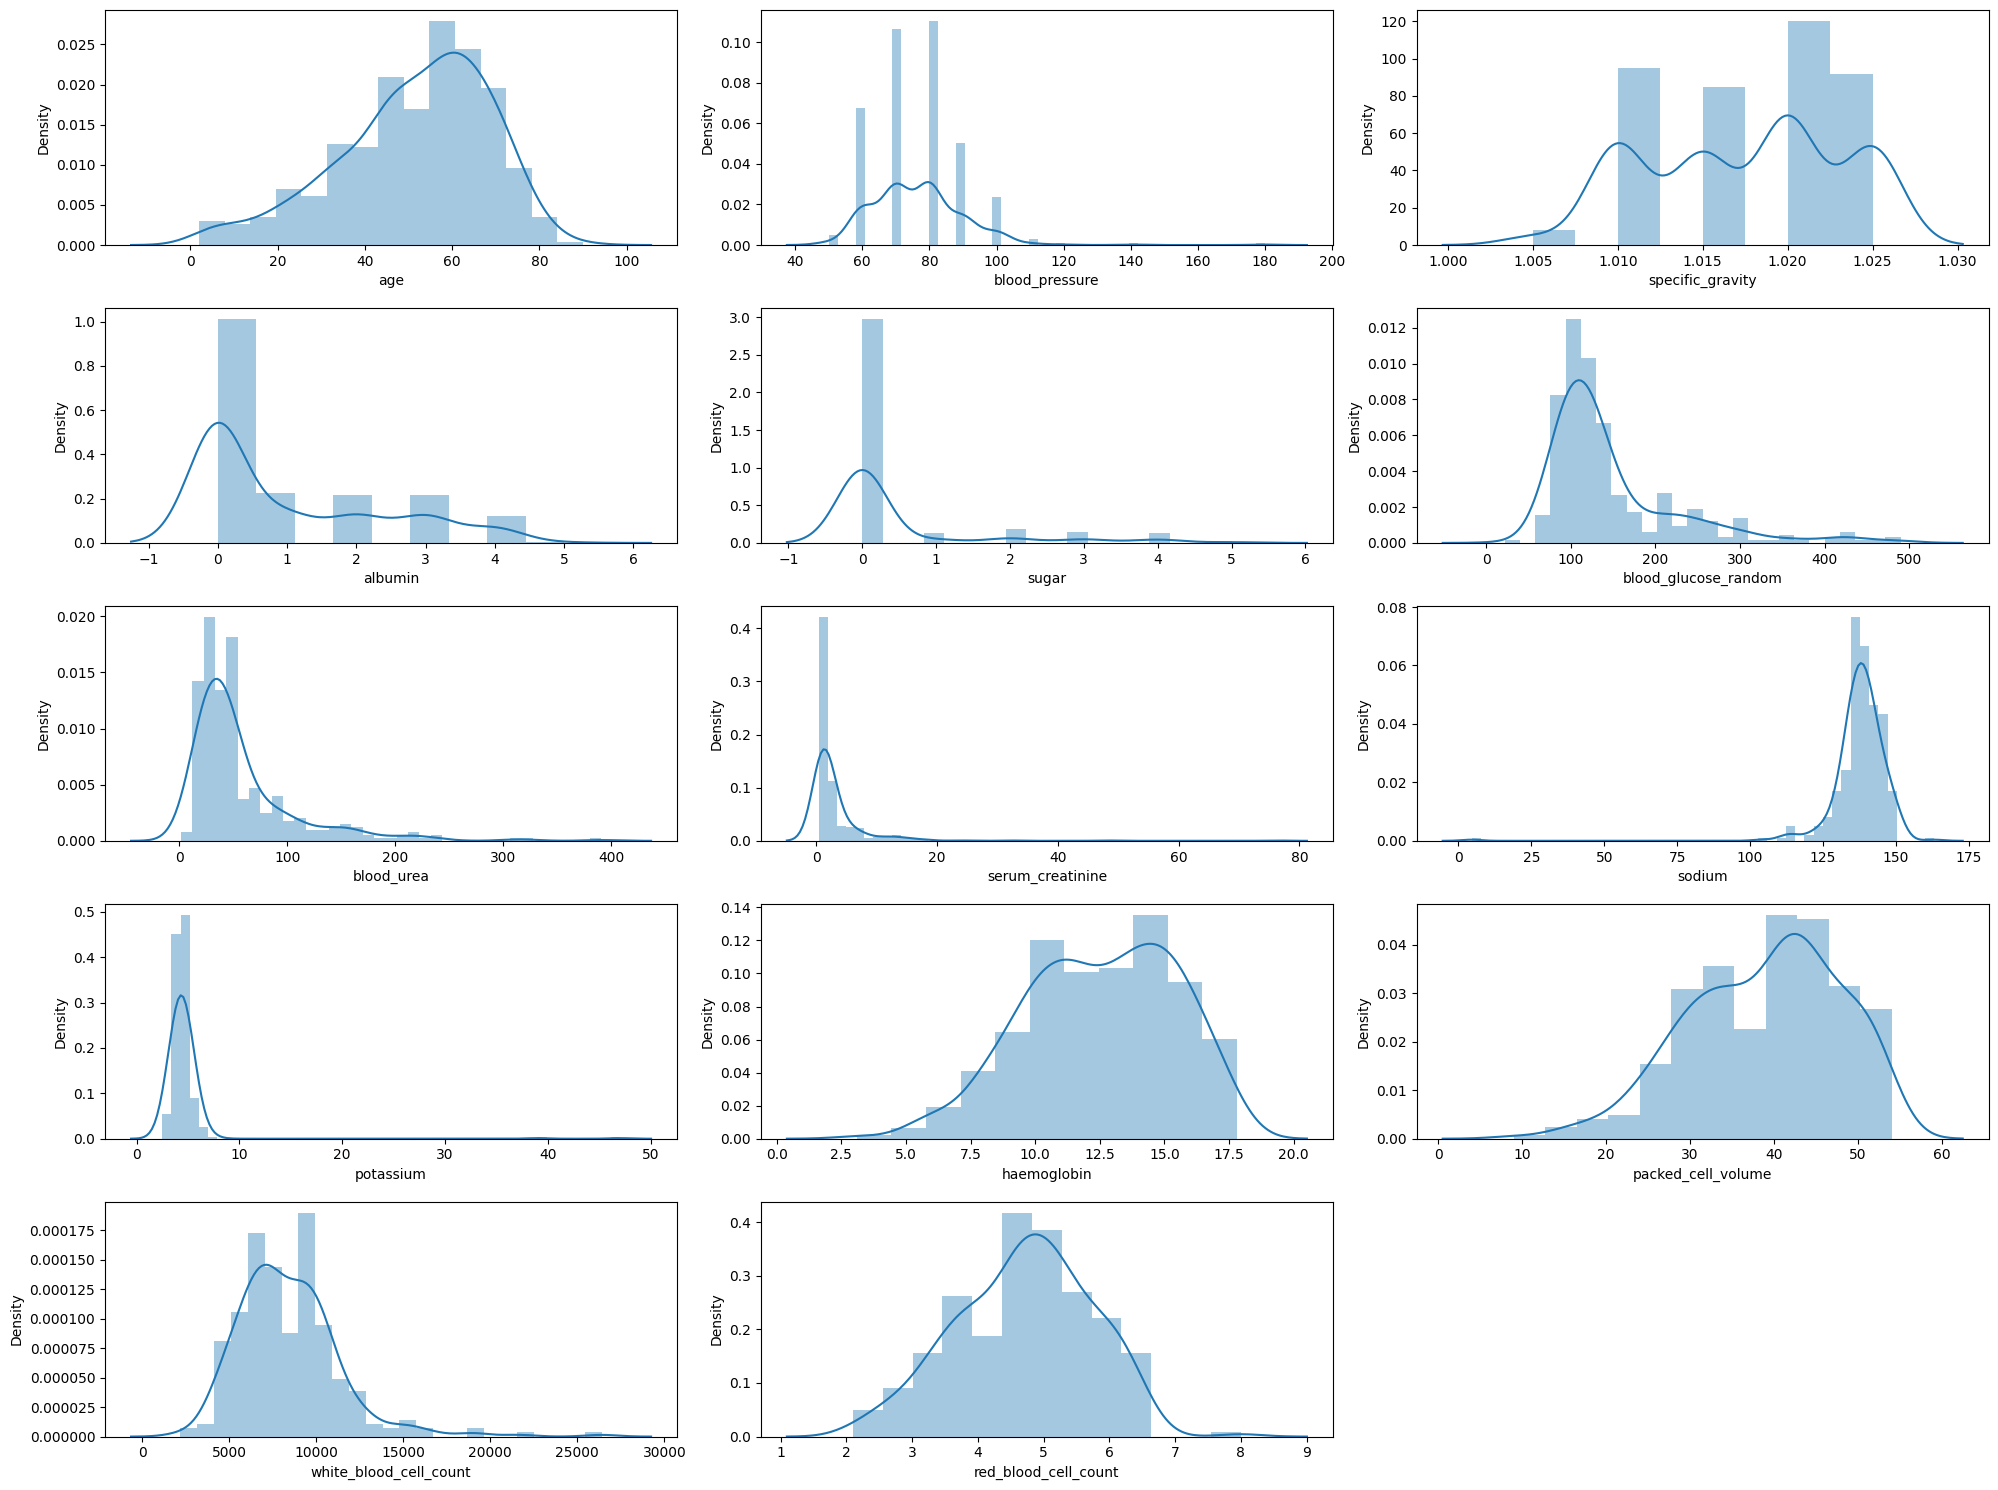

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)

    plotnumber += 1
plt.tight_layout()
plt.show()

<ipython-input-30-37d2f152ed85>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette = 'rocket')
<ipython-input-30-37d2f152ed85>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette = 'rocket')
<ipython-input-30-37d2f152ed85>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette = 'rocket')
<ipython-input-30-37d2f152ed85>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` 

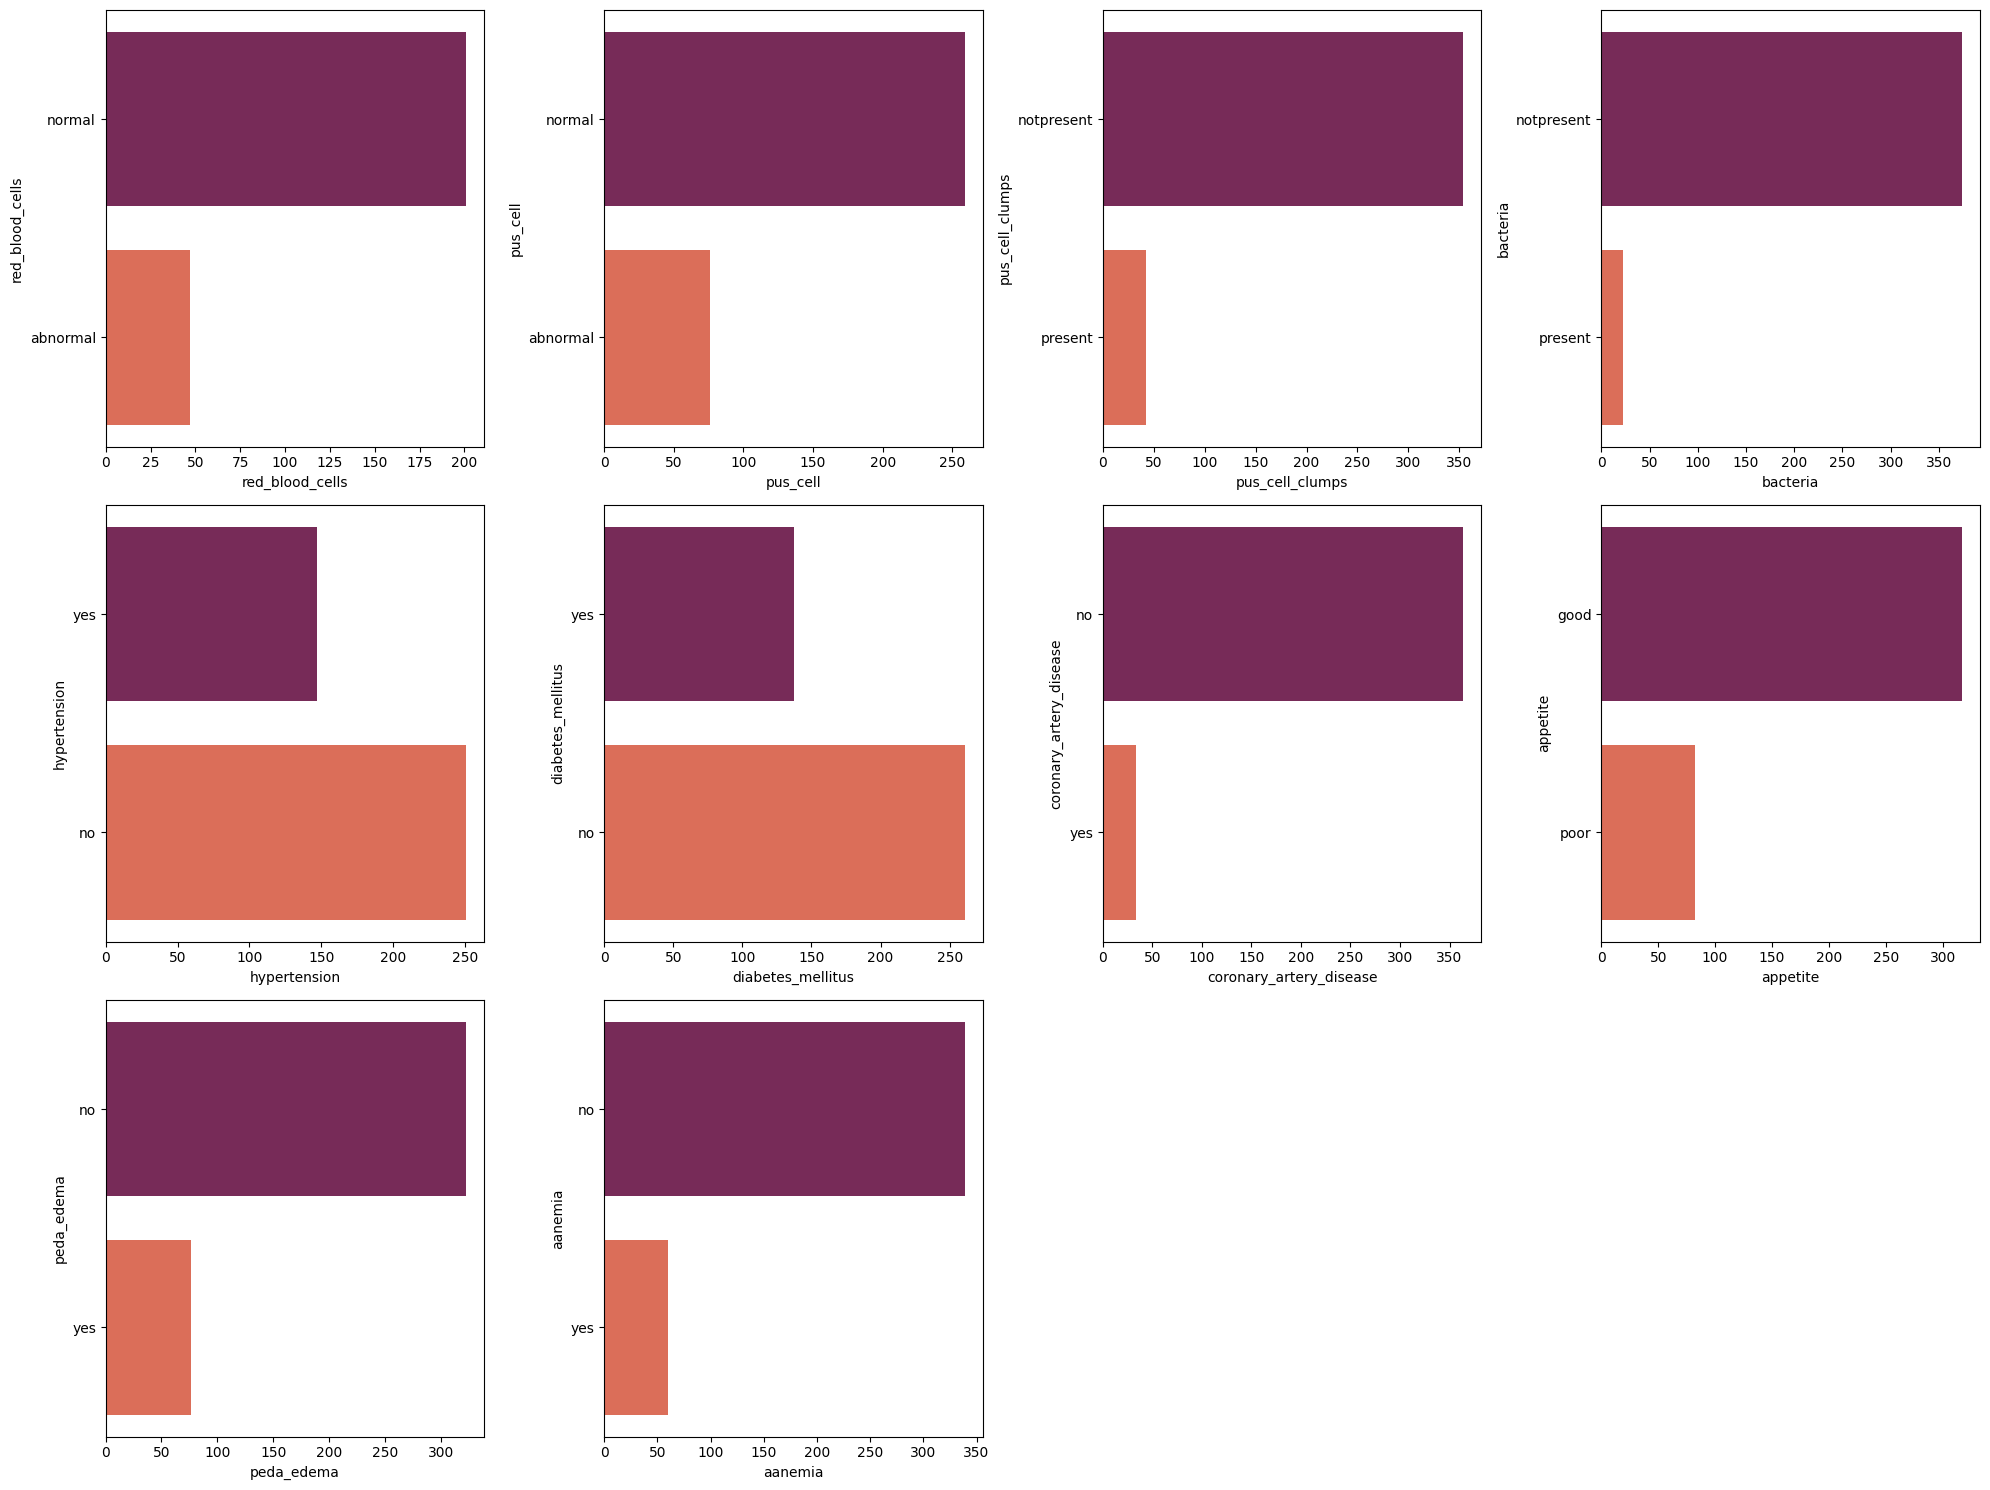

In [30]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_col:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

Column 'red_blood_cells' could not be converted to numeric. Applying Label Encoding.
Column 'pus_cell' could not be converted to numeric. Applying Label Encoding.
Column 'pus_cell_clumps' could not be converted to numeric. Applying Label Encoding.
Column 'bacteria' could not be converted to numeric. Applying Label Encoding.
Column 'hypertension' could not be converted to numeric. Applying Label Encoding.
Column 'diabetes_mellitus' could not be converted to numeric. Applying Label Encoding.
Column 'coronary_artery_disease' could not be converted to numeric. Applying Label Encoding.
Column 'appetite' could not be converted to numeric. Applying Label Encoding.
Column 'peda_edema' could not be converted to numeric. Applying Label Encoding.
Column 'aanemia' could not be converted to numeric. Applying Label Encoding.


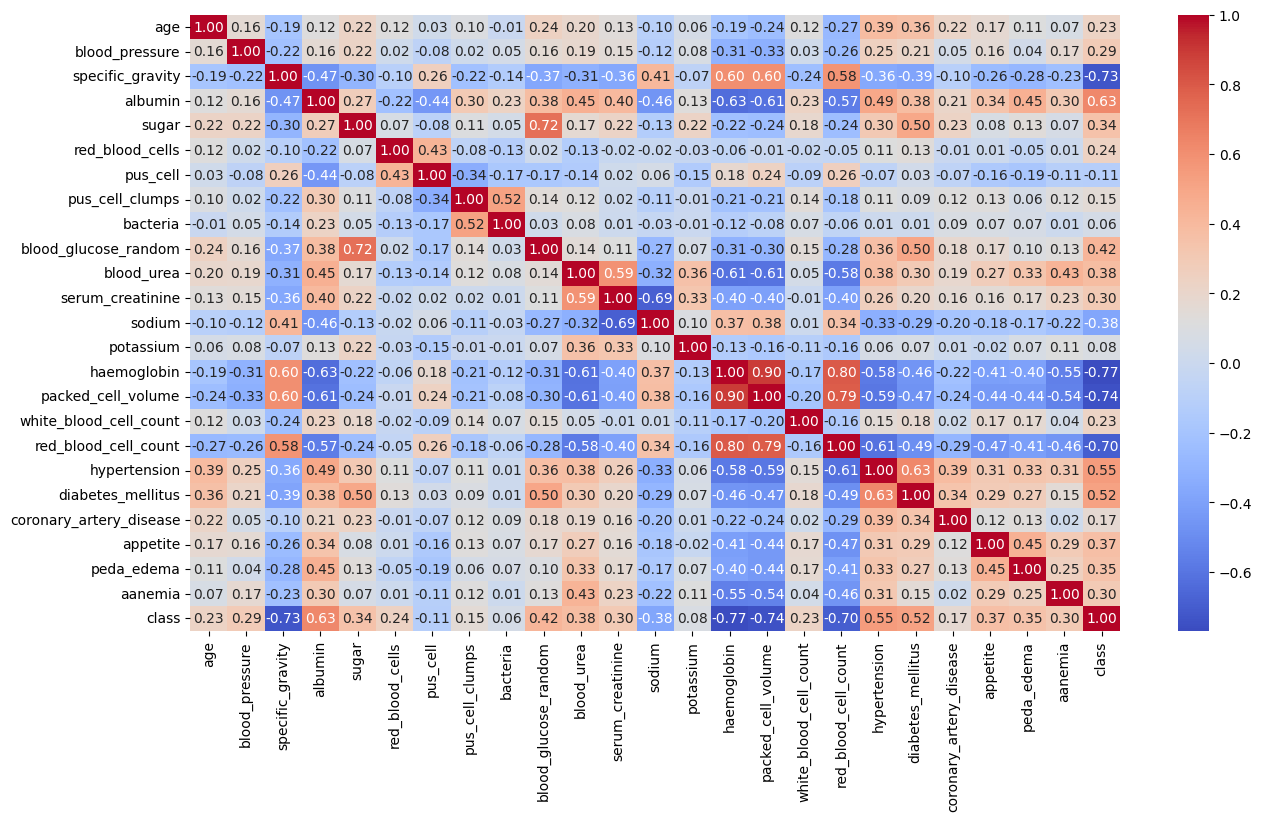

In [32]:
# Convert 'red_blood_cells' and other potentially affected columns to numeric
for col in data.select_dtypes(include=['object']).columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric. Applying Label Encoding.")
        # Apply Label Encoding if conversion to numeric fails
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Now, generate the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [33]:
# Let's impute Nan Values with median in numeric features
for col in num_col:
    data[col]=data[col].fillna(data[col].median())

In [34]:
for col in cat_col:
    print(f" {col} most frequent value is {data[col].mode()}\n")

 red_blood_cells most frequent value is 0    1
Name: red_blood_cells, dtype: int64

 pus_cell most frequent value is 0    1
Name: pus_cell, dtype: int64

 pus_cell_clumps most frequent value is 0    0
Name: pus_cell_clumps, dtype: int64

 bacteria most frequent value is 0    0
Name: bacteria, dtype: int64

 hypertension most frequent value is 0    0
Name: hypertension, dtype: int64

 diabetes_mellitus most frequent value is 0    0
Name: diabetes_mellitus, dtype: int64

 coronary_artery_disease most frequent value is 0    0
Name: coronary_artery_disease, dtype: int64

 appetite most frequent value is 0    0
Name: appetite, dtype: int64

 peda_edema most frequent value is 0    0
Name: peda_edema, dtype: int64

 aanemia most frequent value is 0    0
Name: aanemia, dtype: int64



In [35]:
data['red_blood_cells'].fillna('normal',inplace=True)
data['aanemia'].fillna('no',inplace=True)
data['peda_edema'].fillna('no',inplace=True)
data["coronary_artery_disease"].fillna('no',inplace=True)
data['diabetes_mellitus'].fillna('no',inplace=True)
data['pus_cell_clumps'].fillna('notpresent',inplace=True)
data["coronary_artery_disease"].fillna('no',inplace=True)
data["hypertension"].fillna("no",inplace=True)
data["appetite"].fillna("good",inplace=True)
data["pus_cell"].fillna("normal",inplace=True)
data["bacteria"].fillna("notpresent",inplace=True)

<ipython-input-35-0393d9ac8d5b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['red_blood_cells'].fillna('normal',inplace=True)
<ipython-input-35-0393d9ac8d5b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [36]:
data.isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
blood_glucose_random,0


In [37]:
for col in cat_col:
    print(f"{col} has {data[col].nunique()} categories\n")

red_blood_cells has 3 categories

pus_cell has 3 categories

pus_cell_clumps has 3 categories

bacteria has 3 categories

hypertension has 3 categories

diabetes_mellitus has 3 categories

coronary_artery_disease has 3 categories

appetite has 3 categories

peda_edema has 3 categories

aanemia has 3 categories



In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [39]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [40]:
X=data.drop("class",axis=1)
y=data["class"]

In [41]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7964285714285714
Test Accuracy of KNN is 0.7083333333333334 

Confusion Matrix :- 
[[41  7]
 [28 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.59      0.85      0.70        48
           1       0.86      0.61      0.72        72

    accuracy                           0.71       120
   macro avg       0.73      0.73      0.71       120
weighted avg       0.76      0.71      0.71       120



In [44]:
from sklearn.ensemble import RandomForestClassifier

# Changed 'auto' to 'sqrt' for max_features
rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[48  0]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        72

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

